In [1]:
from flash_ansr import FlashANSR, GenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
# MODEL = "psaegert/flash-ansr-v7.0"
MODEL = "ansr-models/v15.0/checkpoint_2000000"

In [4]:
# install_model(MODEL)

In [46]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=GenerationConfig(method='beam_search', beam_width=128 * 16, equivalence_pruning=True),
    generation_config=GenerationConfig(method='softmax_sampling', choices=1024 * 32),
    parsimony=0.05
).to(device)

In [7]:
widget = ScatterWidget()
widget

ScatterWidget()

In [47]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [48]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 16167/16167 [00:28<00:00, 563.69it/s]


In [49]:
nsr.get_expression()

'(7.54 * (atan((-0.22 * (x1 - -3.55))) * atan(((-8.11 + (x1 + sin(x1))) / -1.77))))'

In [50]:
nsr.compile_results(parsimony=0.05)

In [51]:
nsr.results

,log_prob,fvu,score,expression,complexity,target_complexity,numeric_prediction,raw_beam,beam,raw_beam_decoded,function,refiner,beam_id,fit_constants,fit_covariances,fit_loss
0,-26.391935,0.001847,-1.833488,"[*, <constant>, *, atan, *, <constant>, -, x1,...",18,None,None,"[1, 17, 6, 17, 36, 17, 6, 16, 47, 6, 36, 18, 1...","[17, 6, 17, 36, 17, 6, 16, 47, 6, 36, 18, 15, ...","[*, <constant>, *, atan, *, <constant>, -, x1,...",<function <lambda> at 0x7e5acc689c60>,"Refiner(expression=['*', '<constant>', '*', 'a...",0,"[7.535229039929178, -0.22256781607131643, -3.5...","[[0.030967631066355056, 0.0012931709349310165,...",0.086355
1,-16.880279,0.003695,-1.682381,"[*, <constant>, *, +, <constant>, atan, +, <co...",15,None,None,"[1, 17, 6, 17, 15, 6, 36, 15, 6, 47, 36, 15, 6...","[17, 6, 17, 15, 6, 36, 15, 6, 47, 36, 15, 6, 1...","[*, <constant>, *, +, <constant>, atan, +, <co...",<function <lambda> at 0x7e5acc90a7a0>,"Refiner(expression=['*', '<constant>', '*', '+...",1,"[6.359381905691957, -0.35571600632982125, -6.9...","[[0.018854969161055335, -0.0009131696143876251...",0.172741
2,-19.220325,0.009078,-1.392000,"[/, atan, +, <constant>, *, <constant>, *, x1,...",13,None,None,"[1, 18, 36, 15, 6, 17, 6, 17, 47, 28, 16, 6, 4...","[18, 36, 15, 6, 17, 6, 17, 47, 28, 16, 6, 47, 6]","[/, atan, +, <constant>, *, <constant>, *, x1,...",<function <lambda> at 0x7e5acbd16de0>,"Refiner(expression=['/', 'atan', '+', '<consta...",2,"[-1.0781375735371908, -0.14114689918127532, 6....","[[0.003840473314671605, 0.00047756813351144245...",0.424400
3,-27.392535,0.007694,-1.363840,"[-, <constant>, *, <constant>, atan, *, <const...",15,None,None,"[1, 16, 6, 17, 6, 36, 17, 6, 15, 17, 6, 47, 25...","[16, 6, 17, 6, 36, 17, 6, 15, 17, 6, 47, 25, 1...","[-, <constant>, *, <constant>, atan, *, <const...",<function <lambda> at 0x7e5acc570180>,"Refiner(expression=['-', '<constant>', '*', '<...",3,"[-6.462224492945705, 10.687702436280523, -0.00...","[[0.01412649774191965, -0.00602891052842492, 1...",0.359696
4,-17.844056,0.009854,-1.256404,"[*, <constant>, atan, *, <constant>, +, <const...",15,None,None,"[1, 17, 6, 36, 17, 6, 15, 6, 17, 6, 17, 47, 36...","[17, 6, 36, 17, 6, 15, 6, 17, 6, 17, 47, 36, 1...","[*, <constant>, atan, *, <constant>, +, <const...",<function <lambda> at 0x7e5acd6d1440>,"Refiner(expression=['*', '<constant>', 'atan',...",4,"[9.829718817375673, 0.002880032366900596, -271...","[[0.1892520491583827, 103.3463742423683, 97487...",0.460651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16162,-38.917294,NaN,NaN,"[*, <constant>, *, tan, sin, *, <constant>, x1...",17,None,None,"[1, 17, 6, 17, 33, 31, 17, 6, 47, 26, 17, 6, 2...","[17, 6, 17, 33, 31, 17, 6, 47, 26, 17, 6, 29, ...","[*, <constant>, *, tan, sin, *, <constant>, x1...",<function <lambda> at 0x7e5acc057b00>,"Refiner(expression=['*', '<constant>', '*', 't...",16162,"[-4.45357909016479, -4.641572109518165, -4.739...","[[inf, inf, inf, inf], [inf, inf, inf, inf], [...",NaN
16163,-38.994380,NaN,NaN,"[pow5, atan, -, <constant>, *, <constant>, *, ...",17,None,None,"[1, 26, 36, 16, 6, 17, 6, 17, 47, 16, 6, 16, 4...","[26, 36, 16, 6, 17, 6, 17, 47, 16, 6, 16, 47, ...","[pow5, atan, -, <constant>, *, <constant>, *, ...",<function <lambda> at 0x7e5acc057600>,"Refiner(expression=['pow5', 'atan', '-', '<con...",16163,"[-2.6440451365429682, -4.431495511085501, -2.8...","[[inf, inf, inf, inf], [inf, inf, inf, inf], [...",NaN
16164,-39.527023,NaN,NaN,"[*, <constant>, *, cos, *, <constant>, -, x1, ...",16,None,None,"[1, 17, 6, 17, 32, 17, 6, 16, 47, 6, 28, 17, 6...","[17, 6, 17, 32, 17, 6, 16, 47, 6, 28, 17, 6, 3...","[*, <constant>, *, cos, *, <constant>, -, x1, ...",<function <lambda> at 0x7e5acc0551c0>,"Refiner(expression=['*', '<constant>', '*', 'c...",16164,"[2.078726559002792, -3.248493523372092, -1.708...","[[inf, inf, inf, inf], [inf, inf, inf, inf], [...",NaN
16165,-41.327196,NaN,NaN,"[asin, sin, *, <constant>, pow1_5, +, x1, -, <...",17,None,None,"[1, 34, 31, 17, 6, 30, 15, 4

In [52]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [53]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/Projects/simplipy/src/simplipy/operators.py:113: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/Projects/simplipy/src/simplipy/operators.py:154: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/Projects/simplipy/src/simplipy/operators.py:489: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
<lambdifygenerated-1755701151611701513:1: RuntimeWarning: overflow encountered in multiply
/home/psaegert/Projects/simplipy/src/simplipy/operators.py:30: RuntimeWarning: divide by zero encountered in divide
  return x / y
/home/psaegert/Projects/simplipy/src/simplipy/operators.py:98: RuntimeWarning: overflow encountered in power
  return x ** 5
/home/psaegert/Projects/simplipy/src/simplipy/operators.py:86: RuntimeWarning: overflow encountered in square
  return x ** 2
/home/psaegert/Projects/simplipy/src/simplipy/operators.py:17:

In [54]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

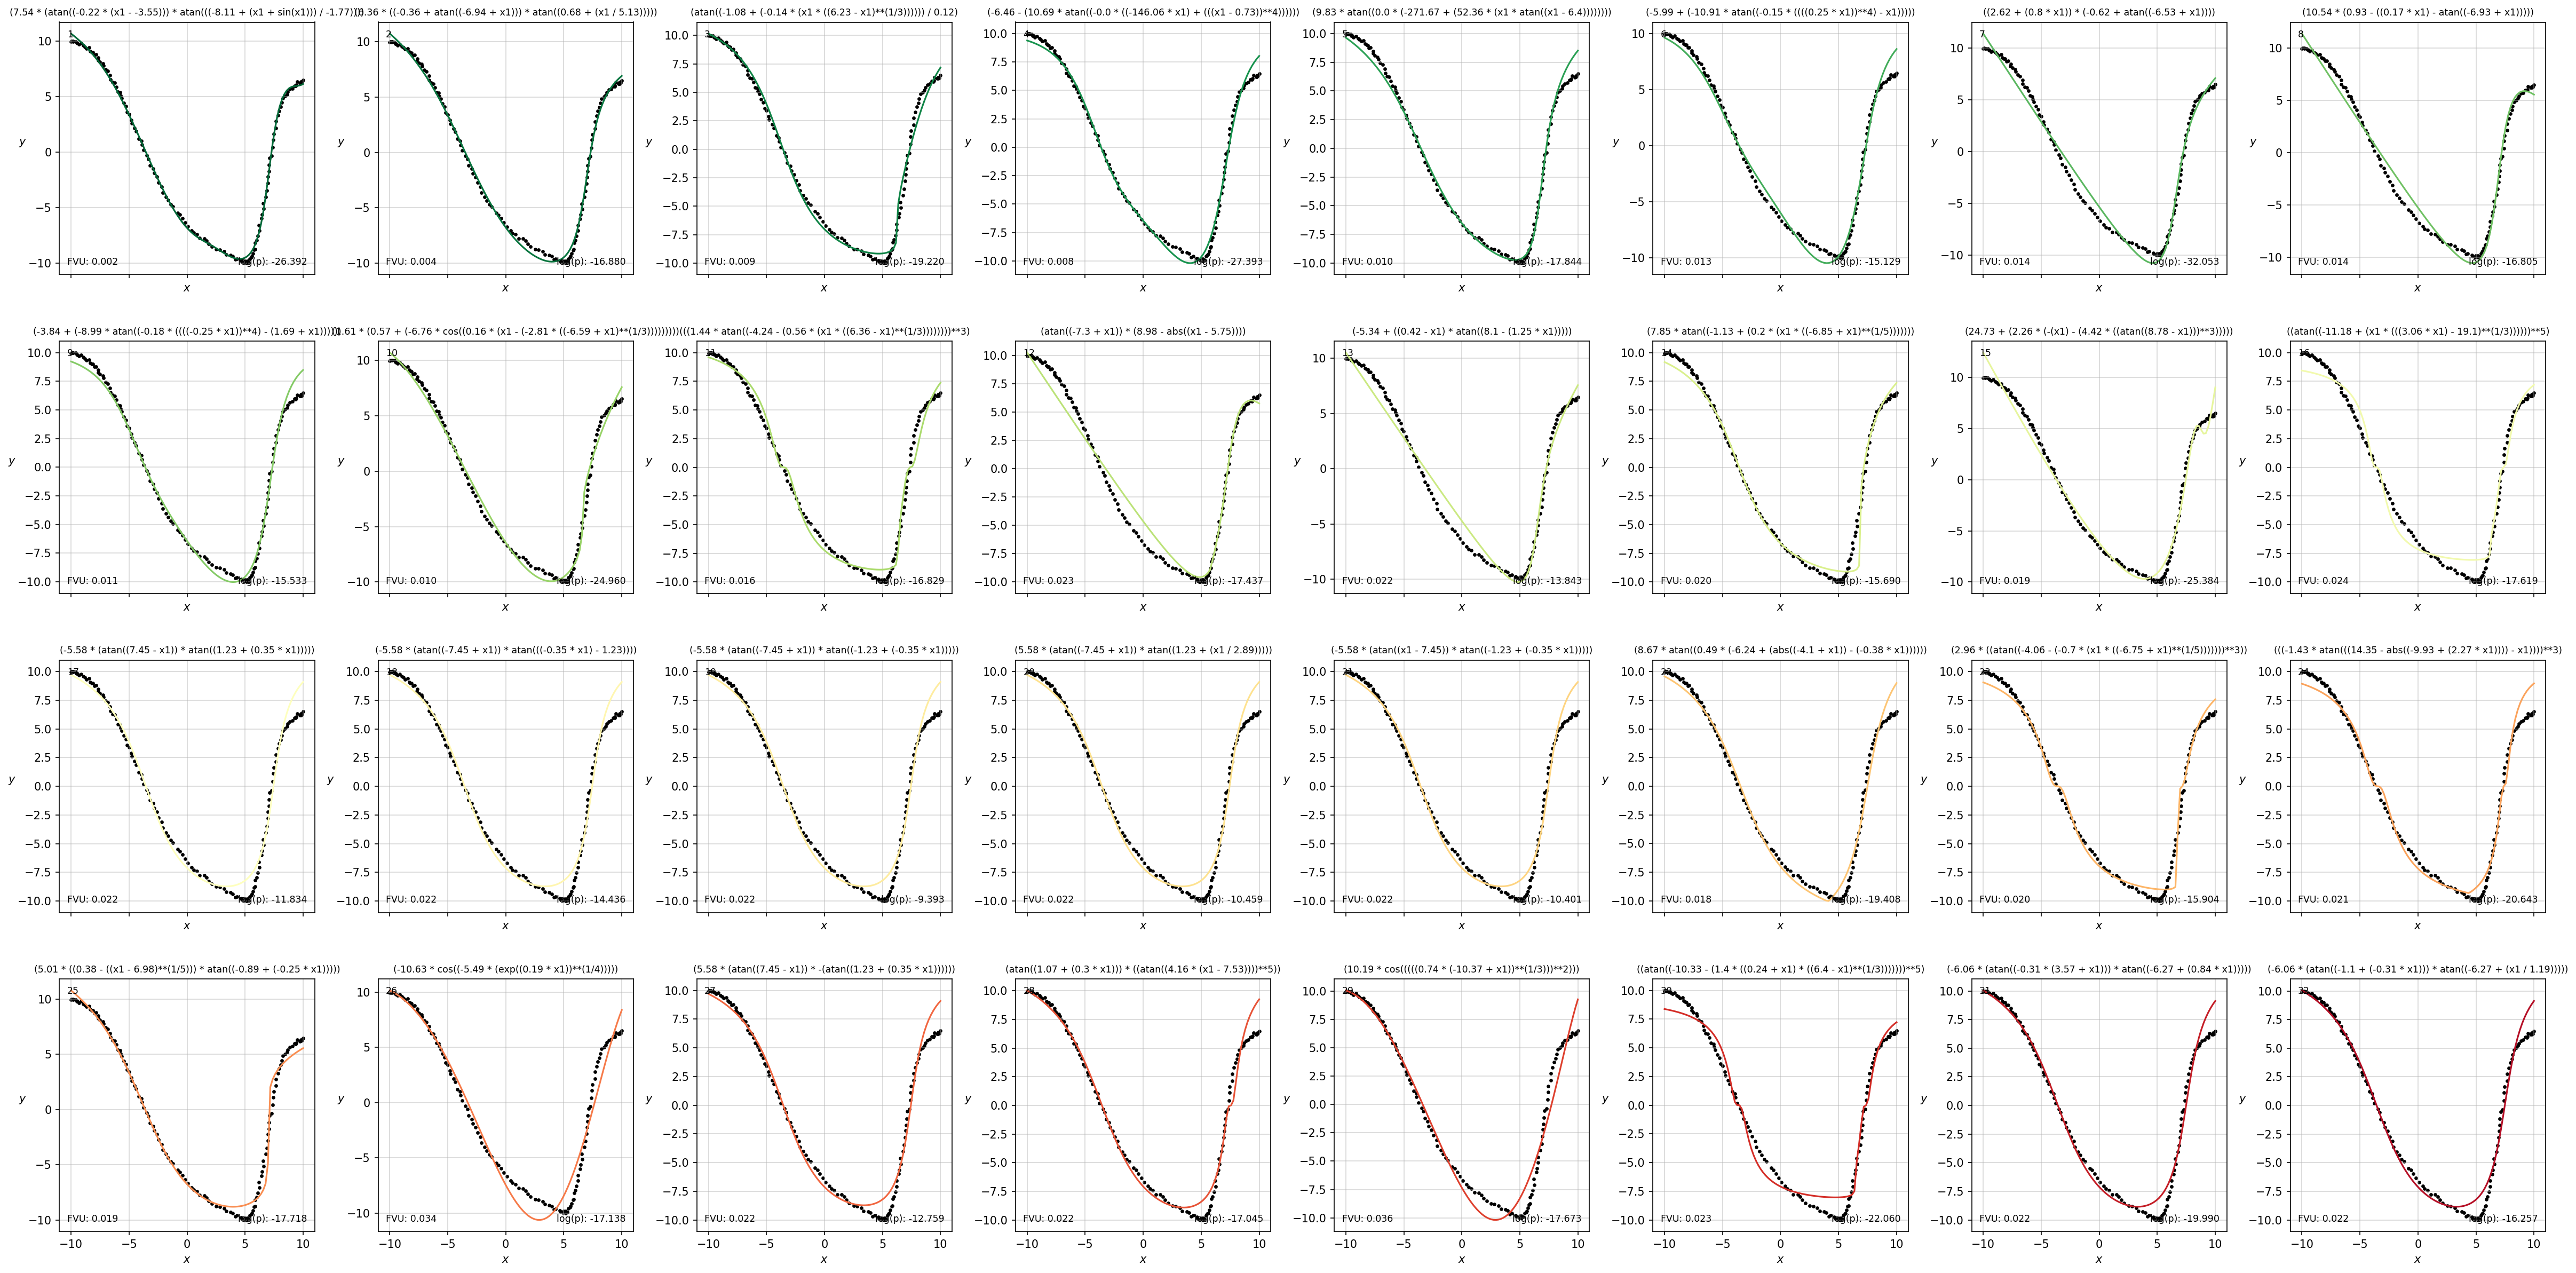

In [55]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)

Text(0, 0.5, 'Complexity')

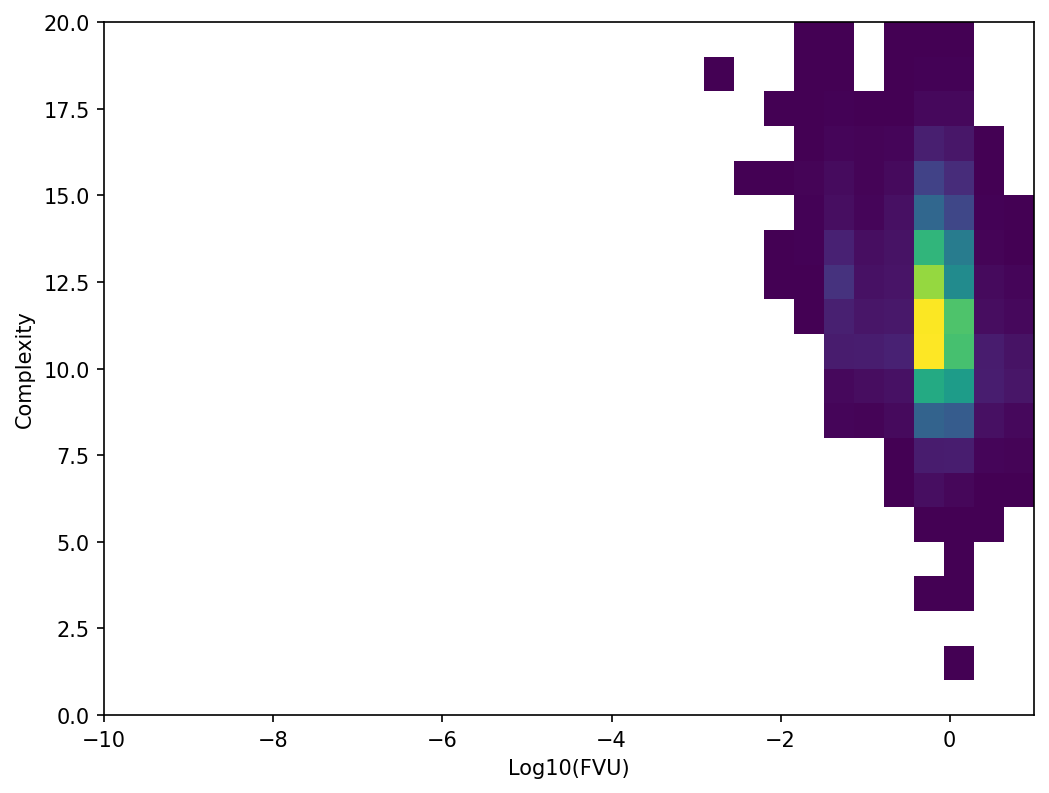

In [56]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['complexity'], bins=(np.linspace(-10, 1, 32), np.linspace(0, 20, 21)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Complexity')